In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X_array = np.linspace(200,1000-1,800)
correction_curve_ = pd.read_excel("Experimental_data/Spectral_images/correction curve.xlsx",engine='openpyxl')
corr_x = np.array(correction_curve_['nm'])[12:313]
corr_y = np.array(correction_curve_['correction curve'])[12:313]
N_corr = corr_x.size
idx_cor = np.zeros(N_corr, dtype=int)
for i in range(N_corr):
    idx_cor[i] = np.where(X_array>=corr_x[i])[0][0]

data = np.zeros((N_corr,1000))
data_wo_corrections_ = np.zeros((N_corr,1000))
for i in range(31):
    data__ = np.loadtxt("Experimental_data/Spectral_images/alldata_formatted_Mes"+str(1+i)+".txt", delimiter=',')
    data_ = data__[idx_cor,:]*np.transpose(np.full((1000, N_corr),corr_y))
    data_wo_corrections = data__[idx_cor,:]
    mean = np.mean(data_)
    mean_wo_corrections = np.mean(data_wo_corrections)
    std = np.std(data_)
    std_wo_corrections = np.std(data_wo_corrections)
    data_ = (data_ - mean)/std
    data_wo_corrections = (data_wo_corrections-mean_wo_corrections)/std_wo_corrections
    data = np.append(data, data_, axis=1)
    data_wo_corrections_ = np.append(data_wo_corrections_, data_wo_corrections, axis=1)
print(data.shape)
data = data[:,1000:]
data_wo_corrections_ = data_wo_corrections_[:,1000:]

# np.savetxt("Data/Hyperspectral_data_curve.txt", data)
# np.savetxt("Data/Hyperspectral_x_array_curve.txt", X_array[idx_cor])
# np.savetxt("Data/Hyperspectral_data_curve_wo_corrections.txt", data_wo_corrections_)
# np.savetxt("Data/Hyperspectral_x_array_curve_wo_corrections.txt", X_array[idx_cor])

In [4]:
X_array = np.linspace(200,1000-1,800)
correction_curve_ = pd.read_excel("Experimental_data/Spectral_images/correction curve.xlsx",engine='openpyxl')
corr_x = np.array(correction_curve_['nm'])[12:313]
corr_y = np.array(correction_curve_['correction curve'])[12:313]
N_corr = corr_x.size
idx_cor = np.zeros(N_corr, dtype=int)
for i in range(N_corr):
    idx_cor[i] = np.where(X_array>=corr_x[i])[0][0]

data = np.loadtxt("Data/Hyperspectral_data_curve.txt")
data_wo_corrections = np.loadtxt("Data/Hyperspectral_data_curve_wo_corrections.txt")
X_array[idx_cor] = np.loadtxt("Data/Hyperspectral_x_array_curve.txt")

X_array_ = X_array[idx_cor]

#### Plot

(301, 31000) (301,)


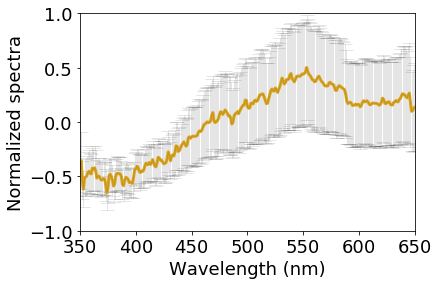

In [5]:
data__ = np.copy(data)
mean_max = np.max(np.mean(data__,axis=1))
std_max = np.max(np.std(data__,axis=1))
data__ = data/(mean_max + std_max)

print(data__.shape, X_array_.shape)

fig, ax = plt.subplots(figsize=(6, 4))
plt.errorbar(X_array_,np.mean(data__,axis=1), yerr = np.std(data__[:,:],axis=1)/std_max, alpha=0.1, color = 'k', linewidth = 1, capsize = 7)
plt.plot(X_array_,np.mean(data__,axis=1), color='goldenrod', linewidth = 3)
plt.xlim(350,650)
plt.xlabel("Wavelength (nm)", fontsize = '18')
plt.ylabel("Normalized spectra", fontsize = '18')
plt.ylim(-1.,1.)
plt.tick_params(labelsize=18)
# ax.xaxis.tick_top()
# plt.savefig("plot_hyperspectrum.pdf", bbox_inches='tight', dpi=150)
plt.show()


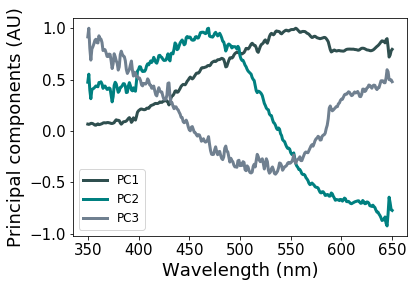

Explained variance PC1 0.8786684001849465
Explained variance PC2 0.9356846962963639
Explained variance PC3 0.9756672370173053


In [89]:
N = data.shape[1]
P = data.shape[0]

mean_vector_ = np.reshape(np.mean(data, axis=1), (1, P))
mean_vector = np.transpose(np.repeat(mean_vector_, N, axis=0))

normal_data = data# - mean_vector

cov_m = np.cov(normal_data)
params = np.linalg.eig(cov_m)
eigvecs = params[1]
eigvals = params[0]

pc1 = -eigvecs[:,0]#*np.mean(data,axis=1)
pc2 = eigvecs[:,1]#*np.mean(data,axis=1)
pc3 = eigvecs[:,2]#*np.mean(data,axis=1)
pc1 /= np.max(pc1)
pc2 /= np.max(pc2)
pc3 /= np.max(pc3)

plt.plot(X_array_[:], pc1, color = 'darkslategray', linewidth = 3, label = "PC1")
plt.plot(X_array_[:], pc2, color = 'teal', linewidth = 3, label = "PC2")
plt.plot(X_array_[:], pc3, color = 'slategray', linewidth = 3, label = "PC3")

plt.tick_params(labelsize = 15)
plt.xlabel("Wavelength (nm)", fontsize = 18)
plt.ylabel("Principal components (AU)", fontsize = 18)
plt.legend(fontsize = 12)
plt.show()
print("Explained variance PC1", np.sum(eigvals[:1])/np.sum(eigvals) )
print("Explained variance PC2", np.sum(eigvals[:2])/np.sum(eigvals) )
print("Explained variance PC3", np.sum(eigvals[:3])/np.sum(eigvals) )